## Classification using Caffe and Tensorflow

In [7]:
#Importando as bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
#%matplotlib inline

DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w10 - Deep Learning\data"

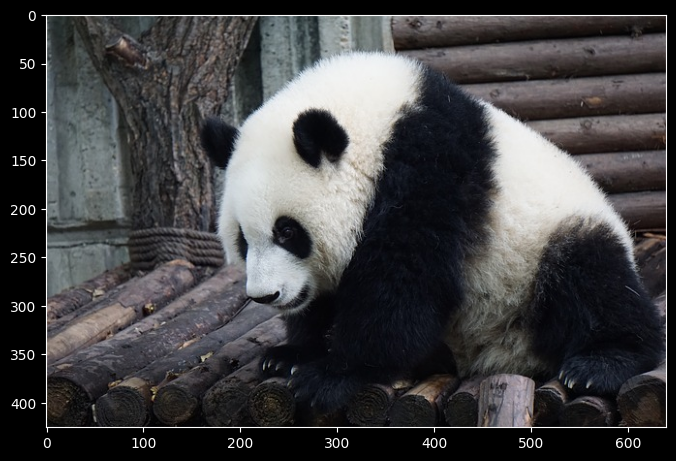

In [9]:
filename = DATA_PATH + "/images/panda.jpg"
image = cv2.imread(filename)

plt.imshow(image[:,:,::-1]);

## Using Caffe

In [103]:
MODEL_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w10 - Deep Learning\models"

protoFile = MODEL_PATH + "/bvlc_googlenet.prototxt"
weightFile = MODEL_PATH + "/bvlc_googlenet.caffemodel"

In [104]:
frame = cv2.imread(filename)
classFile = MODEL_PATH + "/classification_classes_ILSVRC2012.txt"

In [105]:
classes = None
with open(classFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

In [106]:
inHeight = 224
inWidth = 224
mean = [104, 117, 123]
scale = 1.0
swap_rgb = False

In [107]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightFile)

In [108]:
blob = cv2.dnn.blobFromImage(frame, scale, (inWidth, inHeight),
                             mean, swap_rgb, crop = False)

In [109]:
net.setInput(blob)
out = net.forward()
out = out.flatten()

In [110]:
classId = np.argmax(out)
className = classes[classId]
confidence = out[classId]

In [111]:
print(f"Class ID {classId} : \nPredicted Class {className} | Confidence {confidence}")

Class ID 388 : 
Predicted Class giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca | Confidence 0.9999972581863403


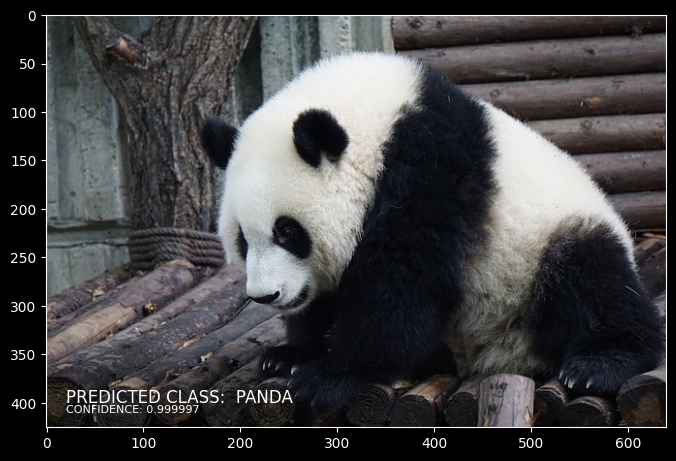

In [114]:
plt.imshow(image[:,:,::-1])
plt.text(20,400, ("Predicted Class: " + className.split(',')[1]).upper(), fontsize=12)
plt.text(20,410, "Confidence: ".upper() + str(round(confidence,6)), fontsize=8);

## Using Tensorflow

In [115]:
MODEL_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w10 - Deep Learning\models"

weightFile = MODEL_PATH + "/tensorflow_inception_graph.pb"
classFile = MODEL_PATH + "/imagenet_comp_graph_label_strings.txt"

In [116]:
classes = None
with open(classFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

In [117]:
inHeight = 224
inWidth = 224
swap_rgb = True
mean = [117, 117, 117]
scale = 1.0

In [118]:
net = cv2.dnn.readNetFromTensorflow(weightFile)
blob = cv2.dnn.blobFromImage(frame, scale, (inWidth, inHeight),
                             mean, swap_rgb, crop=False)


In [119]:
net.setInput(blob)
out = net.forward()
out = out.flatten()

In [120]:
classId = np.argmax(out)
className = classes[classId]
confidence = out[classId]

In [121]:
print(f"Class ID {classId} : \nPredicted Class {className} | Confidence {confidence}")

Class ID 169 : 
Predicted Class giant panda | Confidence 0.9999915361404419


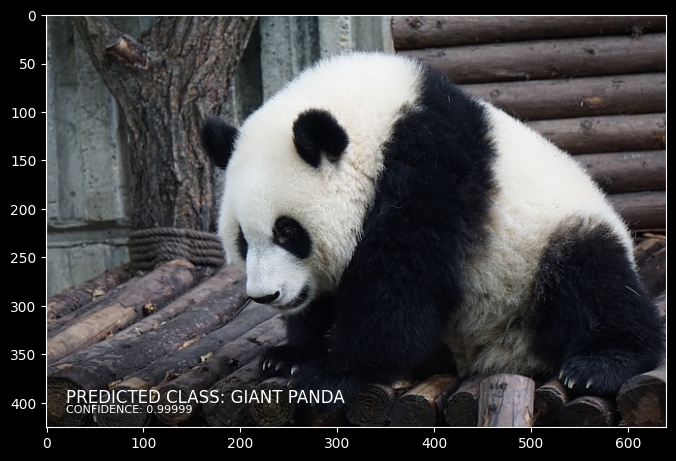

In [122]:
plt.imshow(image[:,:,::-1])
plt.text(20,400, ("Predicted Class: " + className).upper(), fontsize=12)
plt.text(20,410, "Confidence: ".upper() + str(round(confidence,5)), fontsize=8);

https://docs.opencv.org/3.4.3/d6/d0f/group__dnn.html
https://docs.opencv.org/3.4.2/db/d30/classcv_1_1dnn_1_1Net.html
https://github.com/opencv/opencv/tree/master/samples/dnn
https://docs.opencv.org/master/d2/d58/tutorial_table_of_content_dnn.html